<a href="https://colab.research.google.com/github/joaomalossi/wordcloudv2/blob/main/Wordcloud_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist, bigrams
from collections import defaultdict




In [ ]:
# Carregar o dataset a partir do arquivo CSV
from google.colab import files
uploaded = files.upload()



Saving teste.csv to teste.csv


In [ ]:
# Lendo o arquivo CSV e criando um DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['teste.csv']))



In [ ]:
# Função para pré-processamento de texto
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Pré-processar o texto
df['processed_text'] = df['caption_text'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


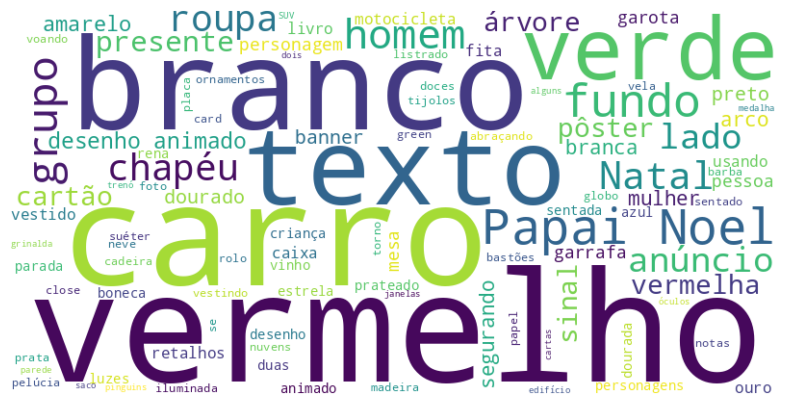

In [ ]:
from wordcloud import STOPWORDS

# Palavras personalizadas que você deseja remover
custom_stopwords = set(['algumas', 'com', 'um', 'e', 'em', 'de', 'uma', 'ao', 'na', 'os', 'para', 'as', 'seu', 'sua'])

# Adicionar palavras do STOPWORDS padrão e suas personalizadas
all_stopwords = STOPWORDS.union(custom_stopwords)

# Criar uma nuvem de palavras com as stopwords removidas
def create_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, stopwords=all_stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

create_wordcloud(' '.join(df['caption_text']))



In [ ]:
# Frequência das palavras
all_words = [word for words in df['processed_text'] for word in words]
freq_dist = FreqDist(all_words)



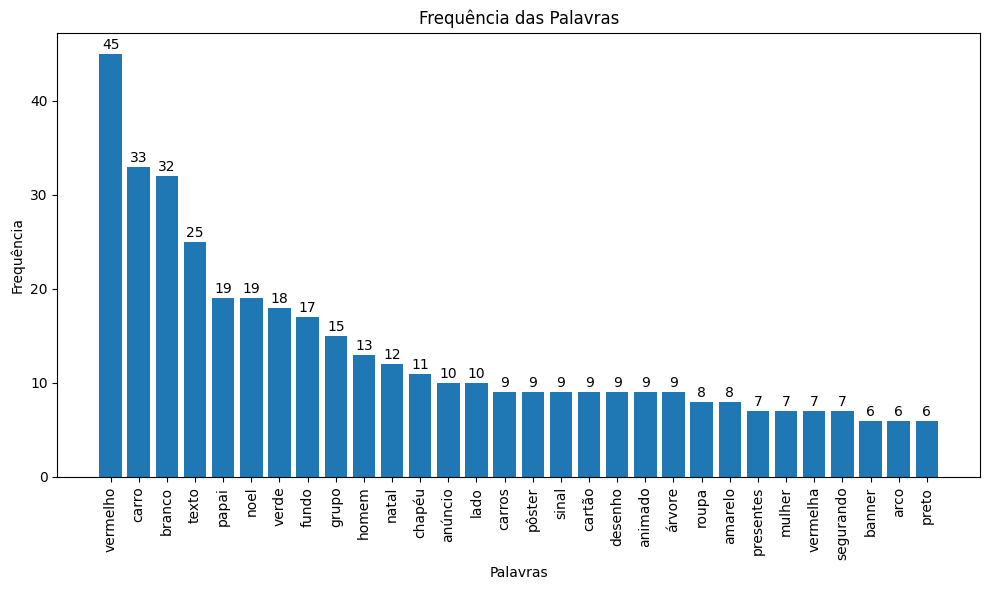

In [ ]:
# Gráfico de barras da frequência das palavras
plt.figure(figsize=(10, 6))
top_words = freq_dist.most_common(30)  # Selecionar as 30 palavras mais frequentes
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.xticks(rotation='vertical')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('Frequência das Palavras')
for i, count in enumerate(counts):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [ ]:
# Bigramas e coocorrência de palavras
word_associations = defaultdict(lambda: defaultdict(int))

for words in df['processed_text']:
    for word1, word2 in bigrams(words):
        word_associations[word1][word2] += 1



In [ ]:
# Tabela de correlações formatada
print("Termo\t\tTermo correlacionado 1\tTermo correlacionado 2\tTermo correlacionado 3")
print("="*100)

for word, associations in word_associations.items():
    top_associations = sorted(associations.items(), key=lambda x: x[1], reverse=True)[:3]
    top_words = ', '.join([f"{assoc[0]} ({assoc[1]})" for assoc in top_associations])
    print(f"{word}\t\t{top_words}")


Termo		Termo correlacionado 1	Termo correlacionado 2	Termo correlacionado 3
papai		noel (19)
noel		sentado (2), trenó (1), saco (1)
trenó		rena (1)
carro		branco (9), vermelho (7), preto (4)
branco		texto (6), arco (2), algumas (2)
prateado		fundo (2), lado (1)
fundo		vermelho (7), verde (5), listrado (2)
alguns		carros (1)
carros		prata (2), fundo (1), caixas (1)
anúncio		vermelho (4), carro (3), verde (1)
vermelho		texto (6), branco (5), amarelo (4)
saco		presentes (1)
homem		roupa (6), vestindo (2), roupas (2)
verde		vermelho (3), texto (2), estrela (1)
estrela		ouro (1)
ouro		bastões (1), branco (1)
bastões		doces (2)
motocicleta		azul (2), fita (1)
azul		carro (2), branco (1)
vestindo		suéter (1), barba (1)
suéter		vermelho (2)
mulher		vestido (2), parada (2), suéter (1)
lado		carro (4), caixa (2), prédio (1)
caixa		vermelha (1), barras (1), fundo (1)
vermelha		branca (2), presente (1), papai (1)
presente		vermelho (1), natal (1)
pôster		sinal (1), presente (1), evento (1)
sinal		

In [ ]:
import csv

# Nome do arquivo CSV de saída
output_csv = 'correlations_results.csv'

# Tabela de correlações formatada
correlations_data = []
correlations_data.append(["Termo", "Termo correlacionado 1", "Termo correlacionado 2", "Termo correlacionado 3"])

for word, associations in word_associations.items():
    top_associations = sorted(associations.items(), key=lambda x: x[1], reverse=True)[:3]
    top_words = ', '.join([f"{assoc[0]} ({assoc[1]})" for assoc in top_associations])
    correlations_data.append([word, *top_words.split(', ')])

# Escrever dados no arquivo CSV
with open(output_csv, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(correlations_data)

print("Arquivo CSV gerado com sucesso!")

# Para download do arquivo CSV
from google.colab import files
files.download(output_csv)


Arquivo CSV gerado com sucesso!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>